In [ ]:
import pandas as pd
mnist = pd.read_csv('mnist_train.csv')
mnist.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist_test = pd.read_csv('mnist_test.csv')
mnist_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_test.drop(columns='7', inplace=True)
mnist_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist.drop(columns='5', inplace=True)
mnist.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist.shape

(59999, 784)

In [ ]:
import numpy as np

data=np.array(mnist)
data=data/255
datatest=np.array(mnist_test)
datatest=datatest/255

In [ ]:
#CS matrix
A=np.random.normal(size=(25,784))
x1 = np.linalg.norm(x=A, ord=2, axis=0, keepdims=True)
A=A/x1

In [ ]:
#y_train
y_train=np.zeros((59999,25))
for i in range(59999):
  y_train[i,:]=np.sign(np.dot(A,data[i,:]))
  #y_test
y_test=np.zeros((9999,25))
for i in range(9999):
  y_test[i,:]=np.sign(np.dot(A,datatest[i,:]))

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(25,))
encoded=input_img
# "encoded" is the encoded representation of the input
#decoded1 = layers.Dense(128, activation='relu')(input_img)
#decoded1 = layers.Dense(128, activation='relu')(encoded)
decoded2 = layers.Dense(256, activation='relu')(encoded)
decoded3 = layers.Dense(512, activation='relu')(decoded2)
decoded = layers.Dense(784, activation='sigmoid')(decoded3)
#encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
#decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder1 = keras.Model(input_img, decoded)
autoencoder1.compile(optimizer='adam', loss='mse')
encoder1 = keras.Model(input_img, encoded)
decoder1 = keras.Model(encoded, decoded)

In [ ]:
autoencoder1.fit(y_train, data,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(y_test, datatest))

Epoch 1/20
469/469 [==============================] - 11s 20ms/step - loss: 0.0496 - val_loss: 0.0417
Epoch 2/20
469/469 [==============================] - 13s 29ms/step - loss: 0.0407 - val_loss: 0.0400
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0393 - val_loss: 0.0391
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0385 - val_loss: 0.0384
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0380 - val_loss: 0.0381
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0375 - val_loss: 0.0378
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0372 - val_loss: 0.0378
Epoch 8/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0369 - val_loss: 0.0374
Epoch 9/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0366 - val_loss: 0.0375
Epoch 10/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0364 - val

In [ ]:
encoded_imgs1 = encoder1.predict(y_test)
decoded_imgs1 = decoder1.predict(encoded_imgs1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
#CS matrix
A2=np.random.normal(size=(100,784))
x2 = np.linalg.norm(x=A2, ord=2, axis=0, keepdims=True)
A2=A2/x2
#y_train
y_train2=np.zeros((59999,100))
for i in range(59999):
  y_train2[i,:]=np.sign(np.dot(A2,data[i,:]))
  #y_test
y_test2=np.zeros((9999,100))
for i in range(9999):
  y_test2[i,:]=np.sign(np.dot(A2,datatest[i,:]))

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(100,))
encoded=input_img
# "encoded" is the encoded representation of the input
#decoded1 = layers.Dense(128, activation='relu')(input_img)
#decoded1 = layers.Dense(128, activation='relu')(encoded)
decoded2 = layers.Dense(256, activation='relu')(encoded)
decoded3 = layers.Dense(512, activation='relu')(decoded2)
decoded = layers.Dense(784, activation='sigmoid')(decoded3)
#encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
#decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder2 = keras.Model(input_img, decoded)
autoencoder2.compile(optimizer='adam', loss='mse')
encoder2 = keras.Model(input_img, encoded)
decoder2 = keras.Model(encoded, decoded)

In [ ]:
autoencoder2.fit(y_train2, data,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(y_test2, datatest))

Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 0.0356 - val_loss: 0.0247
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0232 - val_loss: 0.0217
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0211 - val_loss: 0.0206
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0200 - val_loss: 0.0198
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0193 - val_loss: 0.0195
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0187 - val_loss: 0.0192
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0183 - val_loss: 0.0189
Epoch 8/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0179 - val_loss: 0.0186
Epoch 9/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0176 - val_loss: 0.0185
Epoch 10/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0173 - val_lo

In [ ]:
encoded_imgs2 = encoder2.predict(y_test2)
decoded_imgs2 = decoder2.predict(encoded_imgs2)

313/313 [==============================] - 1s 3ms/step


In [ ]:
#CS matrix
A3=np.random.normal(size=(200,784))
x3 = np.linalg.norm(x=A3, ord=2, axis=0, keepdims=True)
A3=A3/x3
#y_train
y_train3=np.zeros((59999,200))
for i in range(59999):
  y_train3[i,:]=np.sign(np.dot(A3,data[i,:]))
  #y_test
y_test3=np.zeros((9999,200))
for i in range(9999):
  y_test3[i,:]=np.sign(np.dot(A3,datatest[i,:]))

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(200,))
encoded=input_img
# "encoded" is the encoded representation of the input
#decoded1 = layers.Dense(128, activation='relu')(input_img)
#decoded1 = layers.Dense(128, activation='relu')(encoded)
decoded2 = layers.Dense(256, activation='relu')(encoded)
decoded3 = layers.Dense(512, activation='relu')(decoded2)
decoded = layers.Dense(784, activation='sigmoid')(decoded3)
#encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
#decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder3 = keras.Model(input_img, decoded)
autoencoder3.compile(optimizer='adam', loss='mse')
encoder3 = keras.Model(input_img, encoded)
decoder3 = keras.Model(encoded, decoded)

In [ ]:
autoencoder3.fit(y_train3, data,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(y_test3, datatest))

Epoch 1/20
469/469 [==============================] - 10s 19ms/step - loss: 0.0303 - val_loss: 0.0193
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0176 - val_loss: 0.0159
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0150 - val_loss: 0.0145
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0132 - val_loss: 0.0133
Epoch 6/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0127 - val_loss: 0.0130
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0123 - val_loss: 0.0128
Epoch 8/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0120 - val_loss: 0.0126
Epoch 9/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 10/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0115 - val_l

In [ ]:
encoded_imgs3 = encoder3.predict(y_test3)
decoded_imgs3 = decoder3.predict(encoded_imgs3)

313/313 [==============================] - 1s 3ms/step


In [ ]:
#CS matrix
A4=np.random.normal(size=(500,784))
x4 = np.linalg.norm(x=A4, ord=2, axis=0, keepdims=True)
A4=A4/x4
#y_train
y_train4=np.zeros((59999,500))
for i in range(59999):
  y_train4[i,:]=np.sign(np.dot(A4,data[i,:]))
  #y_test
y_test4=np.zeros((9999,500))
for i in range(9999):
  y_test4[i,:]=np.sign(np.dot(A4,datatest[i,:]))

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(500,))
encoded=input_img
# "encoded" is the encoded representation of the input
#decoded1 = layers.Dense(128, activation='relu')(input_img)
#decoded1 = layers.Dense(128, activation='relu')(encoded)
decoded2 = layers.Dense(256, activation='relu')(encoded)
decoded3 = layers.Dense(512, activation='relu')(decoded2)
decoded = layers.Dense(784, activation='sigmoid')(decoded3)
#encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
#decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder4 = keras.Model(input_img, decoded)
autoencoder4.compile(optimizer='adam', loss='mse')
encoder4 = keras.Model(input_img, encoded)
decoder4 = keras.Model(encoded, decoded)

In [ ]:
autoencoder4.fit(y_train4, data,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(y_test4, datatest))

Epoch 1/20
469/469 [==============================] - 14s 22ms/step - loss: 0.0277 - val_loss: 0.0168
Epoch 2/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0150 - val_loss: 0.0130
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0119 - val_loss: 0.0112
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 8/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 9/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0072 - val_loss: 0.0077
Epoch 10/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0070 

In [ ]:
encoded_imgs4 = encoder4.predict(y_test4)
decoded_imgs4 = decoder4.predict(encoded_imgs4)

313/313 [==============================] - 1s 3ms/step


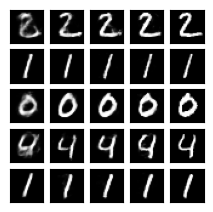

In [ ]:
import matplotlib.pyplot as plt

n = 5  # How many digits we will display
plt.figure(figsize=(2.5, 2.5))
for i in range(n):
    # Display original

    # Display reconstruction
    ax = plt.subplot(5,n,1+i*n )
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5, n,2 + i*n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5,  n,3  +i*n)
    plt.imshow(decoded_imgs3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5,n,  4 +i*n)
    plt.imshow(decoded_imgs4[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5,n,5+i*n)
    plt.imshow(datatest[i].reshape(28, 28))

    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:

from sklearn.metrics import mean_absolute_error
loss25=mean_absolute_error(datatest[0:99],decoded_imgs1[0:99])
loss100=mean_absolute_error(datatest[0:99],decoded_imgs2[0:99])
loss200=mean_absolute_error(datatest[0:99],decoded_imgs3[0:99])
loss500=mean_absolute_error(datatest[0:99],decoded_imgs4[0:99])
l=[loss25,loss100,loss200,loss500]
print(l)

[0.08962792107500583, 0.04996612899529408, 0.03828620690297344, 0.028406168043893818]
